# Exploration des données

## Récupération des variables d'environnement et des librairies

In [171]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [172]:
INCOMMING_DATA = Path(os.environ["INCOMMING_DATA_FOLDER"]).resolve()
OUTGOING_DATA = Path(os.environ["OUTGOING_DATA_FOLDER"]).resolve()

f"{INCOMMING_DATA}  {OUTGOING_DATA}"

'/workspace/data/incomming  /workspace/data/outgoing'

## Récupération des données databank

### Création des variable de dossier de travail

In [173]:
DATABANK_PATH = INCOMMING_DATA / "databank"
DATABANK_PATH

PosixPath('/workspace/data/incomming/databank')

### Liste des fichiers

In [174]:
# get all the files in the databank folder
databank_files = os.listdir(DATABANK_PATH)
databank_files

['lignes_chemin_de_fer.csv',
 'PIB.csv',
 'population_urbaine.csv',
 'prevalence_de_la_malnutrition.csv',
 'traffic_conteneur_dans_les_ports.csv']

### Récupération d'un fichier pour en voir la disposition

In [175]:
# get the first file
file = databank_files[0]
file

'lignes_chemin_de_fer.csv'

In [176]:
# open file with pandas at row 4
reworked_df = pd.read_csv(DATABANK_PATH / file, skiprows=4)
reworked_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# delete all unnamed columns
reworked_df = reworked_df.loc[:, ~reworked_df.columns.str.contains("^Unnamed")]
reworked_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# pivot the table on all columns that can be year
reworked_df = reworked_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value",
)
reworked_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
1,NaN,AFE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
2,Afghanistan,AFG,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
3,NaN,AFW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
4,Angola,AGO,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN


### Creation d'un fonction pour effectuer le processus précédent sur tous les fichiers

In [179]:
def rework_file(path: Path) -> pd.DataFrame:
    """Rework the file to a more usable format."""
    reworked_df = pd.read_csv(path, skiprows=4)
    reworked_df = reworked_df.loc[:, ~reworked_df.columns.str.contains("^Unnamed")]
    return reworked_df.melt(
        id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Value",
    )

### Création d'un dataframe unique avec toutes les données databank

In [180]:
# rework all files and concat them
databank_df = pd.concat(
    [rework_file(DATABANK_PATH / file) for file in databank_files],
    ignore_index=True,
)
databank_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
1,NaN,AFE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
2,Afghanistan,AFG,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
3,NaN,AFW,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN
4,Angola,AGO,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1960,NaN


> Retrait des valeurs nulles

In [181]:
# drop nan values
databank_df = databank_df.dropna()
databank_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
9315,Albanie,ALB,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1995,674.0
9320,Arménie,ARM,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1995,796.0
9324,Autriche,AUT,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1995,5672.0
9325,Azerbaïdjan,AZE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1995,2123.0
9327,Belgique,BEL,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,1995,3368.0


> Filtre sur les données suppérieures à 2000

In [182]:
# filter on year >= 2000
databank_df = databank_df[databank_df["Year"] >= "2000"]

### Affichage des valeurs étudiées

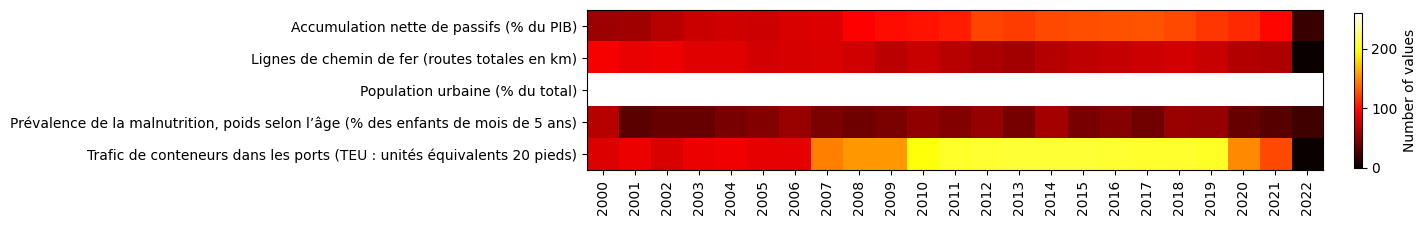

In [183]:
# create a plot table with the number of values per year per indicator
tmp_df = databank_df.pivot_table(
    index="Indicator Name",
    columns="Year",
    values="Value",
    aggfunc="count",
    fill_value=0,
)
plt.figure(figsize=(10, 20))
plt.imshow(tmp_df, cmap="hot", interpolation="nearest")
plt.xticks(range(len(tmp_df.columns)), tmp_df.columns, rotation=90)
plt.yticks(range(len(tmp_df.index)), tmp_df.index)
# show legend at the same size as the plot
plt.colorbar(fraction=0.01, pad=0.04).set_label("Number of values")
# add title to the legend
plt.show()

## Récupération des données Disponibilité alimentaire pour le poulet

In [184]:
# import file named "DisponibiliteAlimentaire_2017.csv"
disponibilite_alimentaire_df = pd.read_csv(
    INCOMMING_DATA / "DisponibiliteAlimentaire_2017.csv"
)
disponibilite_alimentaire_df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [185]:
tmp_keywords = ["viande", "poulet", "volaille"]
tmp_results = []
# filter columns "Produit" that contains one of the keywords
for keyword in tmp_keywords:
    tmp_results += (
        disponibilite_alimentaire_df[
            disponibilite_alimentaire_df["Produit"].str.contains(keyword, case=False)
        ]["Produit"]
        .unique()
        .tolist()
    )

# remove duplicates on the list
tmp_results = list(set(tmp_results))
tmp_results

['Viande, Autre',
 'Viande de Bovins',
 'Viande de Anim Aquatiq',
 'Viande de Suides',
 'Viande de Volailles',
 "Viande d'Ovins/Caprins"]

> So we will filter dataframe on Produit = "Viande de Volailles"

In [186]:
# filter dataframe on "Viande de Vollailes"
disponibilite_alimentaire_vollailes_df = disponibilite_alimentaire_df[
    disponibilite_alimentaire_df["Produit"] == "Viande de Volailles"
]
disponibilite_alimentaire_vollailes_df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [187]:
# display dataframe information with the number of unique values per column
disponibilite_alimentaire_vollailes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 651 to 176400
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2061 non-null   object 
 1   Domaine                 2061 non-null   object 
 2   Code zone               2061 non-null   int64  
 3   Zone                    2061 non-null   object 
 4   Code Élément            2061 non-null   int64  
 5   Élément                 2061 non-null   object 
 6   Code Produit            2061 non-null   int64  
 7   Produit                 2061 non-null   object 
 8   Code année              2061 non-null   int64  
 9   Année                   2061 non-null   int64  
 10  Unité                   2061 non-null   object 
 11  Valeur                  2061 non-null   float64
 12  Symbole                 2061 non-null   object 
 13  Description du Symbole  2061 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory

In [188]:
# create an entry dataframe to avoid any error durring this execution
# (if the cell is executed multiple times)
entry_df = disponibilite_alimentaire_vollailes_df.copy()
# delete columns with only one unique value
for column in entry_df.columns:
    if len(entry_df[column].unique()) == 1:
        entry_df = entry_df.drop(columns=column)

entry_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 651 to 176400
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code zone               2061 non-null   int64  
 1   Zone                    2061 non-null   object 
 2   Code Élément            2061 non-null   int64  
 3   Élément                 2061 non-null   object 
 4   Unité                   2061 non-null   object 
 5   Valeur                  2061 non-null   float64
 6   Symbole                 2061 non-null   object 
 7   Description du Symbole  2061 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 144.9+ KB


In [189]:
# apply it to the original dataframe
disponibilite_alimentaire_vollailes_df = disponibilite_alimentaire_vollailes_df[
    [*entry_df.columns, "Année"]
]
disponibilite_alimentaire_vollailes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 651 to 176400
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code zone               2061 non-null   int64  
 1   Zone                    2061 non-null   object 
 2   Code Élément            2061 non-null   int64  
 3   Élément                 2061 non-null   object 
 4   Unité                   2061 non-null   object 
 5   Valeur                  2061 non-null   float64
 6   Symbole                 2061 non-null   object 
 7   Description du Symbole  2061 non-null   object 
 8   Année                   2061 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 161.0+ KB


In [190]:
# create a dataframe of code elements
code_elements_df = disponibilite_alimentaire_vollailes_df[
    ["Code Élément", "Élément"]
].drop_duplicates()
code_elements_df

,Code Élément,Élément
651,5511,Production
652,5611,Importations - Quantité
653,5072,Variation de stock
654,5301,Disponibilité intérieure
655,5123,Pertes
656,5170,Résidus
657,5142,Nourriture
658,645,Disponibilité alimentaire en quantité (kg/pers...
659,664,Disponibilité alimentaire (Kcal/personne/jour)
660,674,Disponibilité de protéines en quantité (g/pers...


In [191]:
# filter dataframe "Code Élément" on [645]
CODE_DISPONIBILITE_ALIMENTAIRE_EN_QUANTITE = 645
disponibilite_alimentaire_vollailes_df[
    disponibilite_alimentaire_vollailes_df["Code Élément"]
    == CODE_DISPONIBILITE_ALIMENTAIRE_EN_QUANTITE
]

,Code zone,Zone,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Année
658,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,kg,1.53,Fc,Donnée calculée,2017
1713,202,Afrique du Sud,645,Disponibilité alimentaire en quantité (kg/pers...,kg,35.69,Fc,Donnée calculée,2017
2720,3,Albanie,645,Disponibilité alimentaire en quantité (kg/pers...,kg,16.36,Fc,Donnée calculée,2017
3781,4,Algérie,645,Disponibilité alimentaire en quantité (kg/pers...,kg,6.38,Fc,Donnée calculée,2017
4881,79,Allemagne,645,Disponibilité alimentaire en quantité (kg/pers...,kg,19.47,Fc,Donnée calculée,2017
...,...,...,...,...,...,...,...,...,...
172337,236,Venezuela (République bolivarienne du),645,Disponibilité alimentaire en quantité (kg/pers...,kg,20.28,Fc,Donnée calculée,2017
173396,237,Viet Nam,645,Disponibilité alimentaire en quantité (kg/pers...,kg,12.33,Fc,Donnée calculée,2017
174325,249,Yémen,645,Disponibilité alimentaire en quantité (kg/pers...,kg,8.53,Fc,Donnée calculée,2017
175370,251,Zambie,645,Disponibilité alimentaire en quantité (kg/pers...,kg,3.42,Fc,Donnée calculée,2017


## Récupération des données Population 

In [192]:
# open file "Population_2000_2018.csv"
population_df = pd.read_csv(INCOMMING_DATA / "Population_2000_2018.csv")
population_df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [193]:
population_df[["Symbole", "Description du Symbole"]].drop_duplicates()

,Symbole,Description du Symbole
0,X,Sources internationales sûres
171,A,"Agrégat, peut inclure des données officielles,..."


In [194]:
OFFICIAL_DATA_SYMBOL = "X"
population_df = population_df[population_df["Symbole"] == OFFICIAL_DATA_SYMBOL]
population_df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [195]:
population_df[["Code Élément", "Élément"]].drop_duplicates()

,Code Élément,Élément
0,511,Population totale


In [196]:
population_df[["Code Domaine", "Domaine"]].drop_duplicates()

,Code Domaine,Domaine
0,OA,Séries temporelles annuelles


In [197]:
population_df[["Code Produit", "Produit"]].drop_duplicates()

,Code Produit,Produit
0,3010,Population-Estimations


In [198]:
# delete columns with only one unique value
entry_df = population_df.copy()
for column in entry_df.columns:
    if len(entry_df[column].unique()) == 1:
        entry_df = entry_df.drop(columns=column)

entry_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 0 to 4410
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Code zone   4374 non-null   int64  
 1   Zone        4374 non-null   object 
 2   Code année  4374 non-null   int64  
 3   Année       4374 non-null   int64  
 4   Valeur      4374 non-null   float64
 5   Note        258 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 239.2+ KB


In [199]:
population_df = population_df[entry_df.columns]
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 0 to 4410
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Code zone   4374 non-null   int64  
 1   Zone        4374 non-null   object 
 2   Code année  4374 non-null   int64  
 3   Année       4374 non-null   int64  
 4   Valeur      4374 non-null   float64
 5   Note        258 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 239.2+ KB


In [200]:
population_df.head()

,Code zone,Zone,Code année,Année,Valeur,Note
0,2,Afghanistan,2000,2000,20779.953,NaN
1,2,Afghanistan,2001,2001,21606.988,NaN
2,2,Afghanistan,2002,2002,22600.770,NaN
3,2,Afghanistan,2003,2003,23680.871,NaN
4,2,Afghanistan,2004,2004,24726.684,NaN


## Résumé des données

### Résumé des données databank

In [201]:
databank_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
10645,Albanie,ALB,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,2000,440.0
10650,Arménie,ARM,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,2000,843.0
10654,Autriche,AUT,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,2000,5665.0
10655,Azerbaïdjan,AZE,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,2000,2116.0
10657,Belgique,BEL,Lignes de chemin de fer (routes totales en km),IS.RRS.TOTL.KM,2000,3471.0


| colonne | type | description |
| --- | --- | --- |
| Coutry Name | object | Nom du pays |
| Country Code | object | Code du pays |
| Indicator Name | object | Nom de l'indicateur |
| Indicator Code | object | Code de l'indicateur |
| year | int64 | Année |
| value | float64 | Valeur de l'indicateur |

In [204]:
# To help copilot this is the table we have for databank_df

# | colonne | type | description |
# | --- | --- | --- |
# | Coutry Name | object | Nom du pays |
# | Country Code | object | Code du pays |
# | Indicator Name | object | Nom de l'indicateur |
# | Indicator Code | object | Code de l'indicateur |
# | year | int64 | Année |
# | value | float64 | Valeur de l'indicateur |

### Résumé des données Disponibilité alimentaire pour le poulet

In [203]:
disponibilite_alimentaire_vollailes_df.head()

,Code zone,Zone,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Année
651,2,Afghanistan,5511,Production,Milliers de tonnes,28.0,S,Données standardisées,2017
652,2,Afghanistan,5611,Importations - Quantité,Milliers de tonnes,29.0,S,Données standardisées,2017
653,2,Afghanistan,5072,Variation de stock,Milliers de tonnes,0.0,S,Données standardisées,2017
654,2,Afghanistan,5301,Disponibilité intérieure,Milliers de tonnes,57.0,S,Données standardisées,2017
655,2,Afghanistan,5123,Pertes,Milliers de tonnes,2.0,S,Données standardisées,2017


| colonne | type | description |
| --- | --- | --- |
| Code zone | object | Code du pays |
| Zone | object | Nom du pays |
| Code Élément | object | Code de l'élément |
| Élément | object | Nom de l'élément |
| Unité | object | Unité de l'élément |
| Valeur | float64 | Valeur de l'élément |
| Symbole | object | Symbole de l'élément |
| Description du Symbole | object | Description du symbole de l'élément |
|Année | int64 | Année |

In [ ]:
# To help copilot this is the table we have for disponibilite_alimentaire_vollailes_df

# | colonne | type | description |
# | --- | --- | --- |
# | Code zone | object | Code du pays |
# | Zone | object | Nom du pays |
# | Code Élément | object | Code de l'élément |
# | Élément | object | Nom de l'élément |
# | Unité | object | Unité de l'élément |
# | Valeur | float64 | Valeur de l'élément |
# | Symbole | object | Symbole de l'élément |
# | Description du Symbole | object | Description du symbole de l'élément |
# |Année | int64 | Année |

### Résumé des données Population

In [205]:
population_df.head()

,Code zone,Zone,Code année,Année,Valeur,Note
0,2,Afghanistan,2000,2000,20779.953,NaN
1,2,Afghanistan,2001,2001,21606.988,NaN
2,2,Afghanistan,2002,2002,22600.770,NaN
3,2,Afghanistan,2003,2003,23680.871,NaN
4,2,Afghanistan,2004,2004,24726.684,NaN


| colonne | type | description |
| --- | --- | --- |
| Code Zone | object | Code du pays |
| Zone | object | Nom du pays |
| Code Année | int64 | Année |
| Année | int64 | Année |
| Valeur | float64 | Valeur de l'élément |
| Note | object | Note de l'élément |

In [206]:
# To help copilot this is the table we have for population_df

# | colonne | type | description |
# | --- | --- | --- |
# | Code Zone | object | Code du pays |
# | Zone | object | Nom du pays |
# | Code Année | int64 | Année |
# | Année | int64 | Année |
# | Valeur | float64 | Valeur de l'élément |
# | Note | object | Note de l'élément |

# Création d'une ACP (Analyse en Composantes Principales)

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine the dataframes
combined_df = pd.concat(
    [population_df, databank_df, disponibilite_alimentaire_vollailes_df], axis=1
)

# Drop any rows with missing values
combined_df.dropna(inplace=True)

# Separate the features from the target variable
X = combined_df.drop(columns=["Target_Variable"])
y = combined_df["Target_Variable"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# Add the target variable to the PCA dataframe
pca_df["Target_Variable"] = y

# Plot the PCA results
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Target_Variable"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.show()

KeyError: "['Target_Variable'] not found in axis"

In [ ]:
# we what to make a PCA on the three dataframes
# we need to have the same columns
# we need to have the same number of rows
# we need to have the same type of data

In [ ]:
# merge the three dataframes on the country code
